In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [4]:
df=pd.read_csv("D:/back/projects_and_portfolio/Machine Learning/01_Regression/multi_methode/housePrice.csv")
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [5]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [6]:
df['Address'] = df['Address'].fillna(0)
df['Address'] = df['Address'].interpolate()

C:\Users\AERO\AppData\Local\Temp\ipykernel_7208\3636173559.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['Address'] = df['Address'].interpolate()


In [7]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [8]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [9]:
lebel_encoder=LabelEncoder()
df['Parking']=lebel_encoder.fit_transform(df['Parking'])
df['Warehouse']=lebel_encoder.fit_transform(df['Warehouse'])
df['Elevator']=lebel_encoder.fit_transform(df['Elevator'])

In [10]:
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,1,1,0,North Program Organization,2.050000e+09,68333.33
6,87,2,1,1,1,Pardis,6.000000e+08,20000.00
7,59,1,1,1,1,Shahran,2.150000e+09,71666.67
8,54,2,1,1,0,Andisheh,4.930000e+08,16433.33
9,71,1,1,1,1,West Ferdows Boulevard,2.370000e+09,79000.00


array([[<Axes: title={'center': 'Room'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Warehouse'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Price(USD)'}>]], dtype=object)

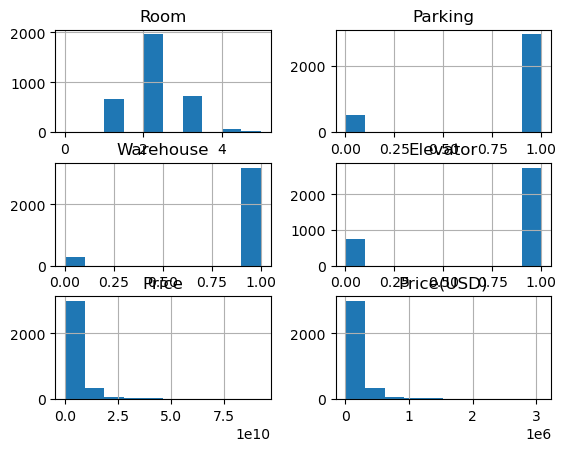

In [11]:
df.hist()

<Axes: ylabel='Area'>

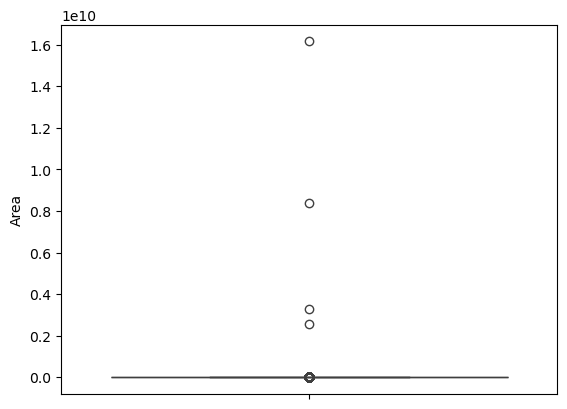

In [12]:
df['Area'] = df['Area'].str.replace(',', '')
df['Area'] = df['Area'].astype(float)
import seaborn as sns
sns.boxplot(df['Area'])

In [13]:
print("New Shape: ", df.shape)

New Shape:  (3479, 8)


In [14]:
Q1, Q3 = np.quantile(df['Area'], [0.25, 0.75])
    
IQR = Q3 - Q1

Max_IQR = Q3 + 1.5 * IQR
Min_IQR = Q1 - 1.5 * IQR

df.loc[df['Area'] < Min_IQR, 'Area'] = np.nan
df.loc[df['Area'] > Max_IQR, 'Area'] = np.nan
df = df.dropna()
print("New Shape: ", df.shape)

New Shape:  (3235, 8)


In [15]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

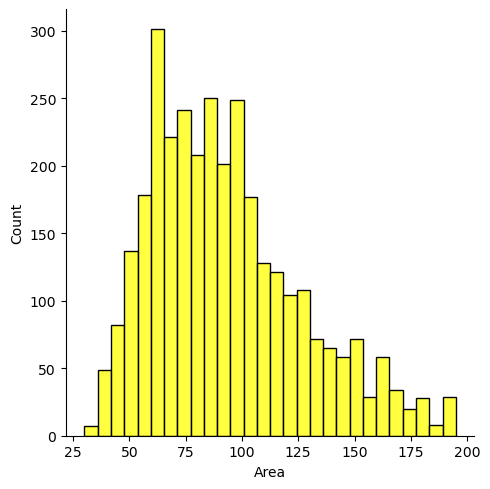

In [16]:
sns.displot(df['Area'], color='yellow')

<Axes: ylabel='Area'>

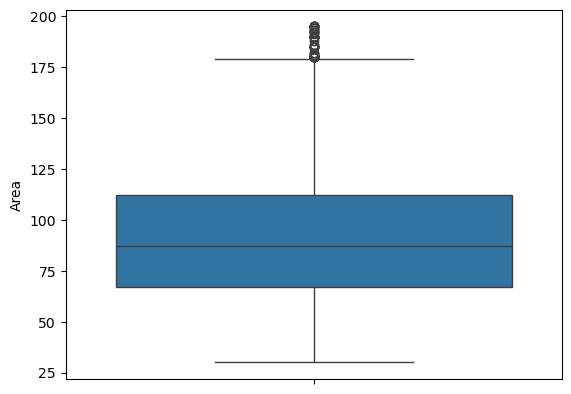

In [17]:
import seaborn as sns
sns.boxplot(df['Area'])

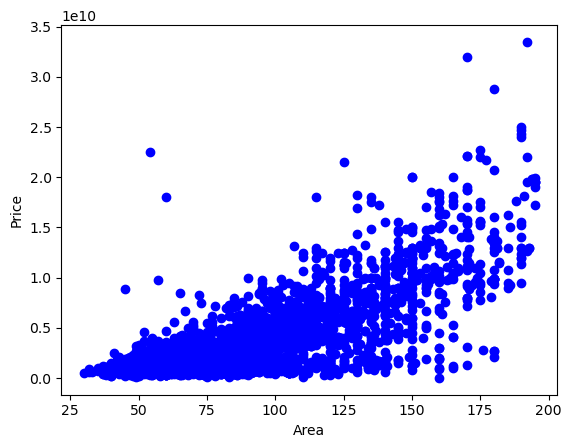

In [18]:
plt.scatter(df['Area'],df['Price'],color='b')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# 1_multipie with numbreical address

In [19]:
pd.get_dummies(df, drop_first=True)
X = df.drop(['Price', 'Price(USD)'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train_encoded = pd.get_dummies(X_train)
cols = X_train_encoded.columns.tolist()
X_test_encoded = pd.get_dummies(X_test)
X_test_encoded = X_test_encoded.reindex(columns=cols).fillna(0)
X_test_encoded
regr = linear_model.LinearRegression()
regr.fit(X_train_encoded, y_train)
regr.intercept_
regr.coef_
test_y_=regr.predict(X_test_encoded)
r2_score(test_y_,y_test)

0.8226137255241899

# 2_multipie without address

In [20]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]
regr = linear_model.LinearRegression()
x1=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator']])
y1=np.asanyarray(train[['Price']])
regr.fit(x1, y1)
regr.intercept_
regr.coef_
test_x=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator']])
test_y=np.asanyarray(test[['Price']])
test_y_=regr.predict(test[['Area','Room','Parking','Warehouse','Elevator']])
r2_score(test_y,test_y_)

c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.5615833248726991

# 3_quantile regression (Area And Price)

In [21]:
# Define the quantile levels you want to use (e.g., 0.25, 0.5, and 0.75)
quantiles = [0.25, 0.5, 0.75]

# Fit quantile regression models for each quantile level
quantile_models = {}
for q in quantiles:
    model = sm.QuantReg(df['Price'], sm.add_constant(df['Area'])).fit(q=q)
    quantile_models[q] = model

# Predict values for each quantile level
quantile_predictions = {}
for q, model in quantile_models.items():
    predictions = model.predict(sm.add_constant(df['Area']))
    quantile_predictions[q] = predictions

# Calculate the R-squared score for each quantile level
r2_scores = {}
for q in quantiles:
    r2 = r2_score(df['Price'], quantile_predictions[q])
    r2_scores[q] = r2

# Display the R-squared scores for each quantile level
for q, r2 in r2_scores.items():
    print(f'R-squared score (q={q}): {r2:.4f}')

c:\ProgramData\anaconda3\envs\ai\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\ProgramData\anaconda3\envs\ai\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


R-squared score (q=0.25): 0.2560
R-squared score (q=0.5): 0.5185
R-squared score (q=0.75): 0.4236


c:\ProgramData\anaconda3\envs\ai\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
